# Keras Tutorials

### Run with GPU (if GPU faster CPU)

In [80]:
# # Check for GPU availability
# import tensorflow as tf
# print(len(tf.config.experimental.list_physical_devices('GPU')) > 0)

In [81]:
# tf.config.set_visible_devices([], 'GPU')
# # physical_devices = tf.config.experimental.list_physical_devices('GPU')
# # tf.config.experimental.set_memory_growth(physical_devices[0], True)

## Generate data

In [82]:
import numpy as np
import random
from random import randint
from sklearn.utils import shuffle
from  sklearn.preprocessing import MinMaxScaler

In [83]:
train_labels = []
train_samples = []

### Example data:
- An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial.
- The trial had 2100 participants. Half were under 65 years old, half were 65 years or older.
- Around 95% of patients 65 or older experienced side effects.
- Around 95% of patients under 65 experienced no side effects.

In [84]:
random.seed(0)

for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [85]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

In [86]:
train_samples

array([37, 91, 15, ..., 91, 17, 99])

In [87]:
train_labels

array([1, 0, 1, ..., 1, 0, 1])

In [88]:
train_samples, train_labels = shuffle(train_samples, train_labels)

In [89]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [90]:
scaled_train_samples

array([[0.56321839],
       [0.59770115],
       [0.24137931],
       ...,
       [0.64367816],
       [0.88505747],
       [0.71264368]])

## Simple tf.keras Sequential Model

In [91]:
# For building models
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense

# For training models
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

## Build the Model

In [92]:
model = Sequential([
    Dense(name="Layer_2", units=16, input_shape=(1,), activation="relu"), # The first hidden layer (the second layover overall)
    Dense(name="Layer_3", units=32, activation="relu"),
    Dense(name="Layer_4", units=2, activation="softmax")
])

In [93]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_2 (Dense)             (None, 16)                32        
                                                                 
 Layer_3 (Dense)             (None, 32)                544       
                                                                 
 Layer_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [95]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30


189/189 - 1s - loss: 0.6845 - accuracy: 0.5444 - val_loss: 0.6770 - val_accuracy: 0.5905 - 519ms/epoch - 3ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6624 - accuracy: 0.6460 - val_loss: 0.6572 - val_accuracy: 0.6524 - 213ms/epoch - 1ms/step
Epoch 3/30
189/189 - 0s - loss: 0.6404 - accuracy: 0.6989 - val_loss: 0.6373 - val_accuracy: 0.6905 - 206ms/epoch - 1ms/step
Epoch 4/30
189/189 - 0s - loss: 0.6144 - accuracy: 0.7397 - val_loss: 0.6131 - val_accuracy: 0.7333 - 220ms/epoch - 1ms/step
Epoch 5/30
189/189 - 0s - loss: 0.5878 - accuracy: 0.7693 - val_loss: 0.5903 - val_accuracy: 0.7429 - 214ms/epoch - 1ms/step
Epoch 6/30
189/189 - 0s - loss: 0.5610 - accuracy: 0.7884 - val_loss: 0.5667 - val_accuracy: 0.7524 - 222ms/epoch - 1ms/step
Epoch 7/30
189/189 - 0s - loss: 0.5335 - accuracy: 0.8095 - val_loss: 0.5427 - val_accuracy: 0.7762 - 228ms/epoch - 1ms/step
Epoch 8/30
189/189 - 0s - loss: 0.5061 - accuracy: 0.8254 - val_loss: 0.5193 - val_accuracy: 0.8048 - 222ms/epoch - 1ms/step
Epoch 9/30


## Preprocess Test Data

In [96]:
test_labels = []
test_samples = []

In [97]:
random.seed(101)

for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The ~95% of older individuals who experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [98]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_samples, test_labels = shuffle(test_samples, test_labels)

In [99]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

## Predict

In [100]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [101]:
predictions

array([[0.864759  , 0.13524096],
       [0.961234  , 0.038766  ],
       [0.39500007, 0.60499996],
       ...,
       [0.9618731 , 0.03812691],
       [0.21977437, 0.7802257 ],
       [0.57302547, 0.42697456]], dtype=float32)

In [102]:
rounded_predictions = np.argmax(predictions, axis=1)

## Confusion matrix

In [103]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [104]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [109]:
def plot_confusion_matrix(
    cm, classes, percentiles=False, 
        normalize=False, title="Confusion matrix", cmap=plt.cm.Blues
):
    """
    This function prints and plots the confusion matrix.
    Nomralization can be applied by setting "normalize=True"
    """

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    threshold = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
        )
        plt.tight_layout()
        plt.ylabel("True Labels")
        plt.xlabel("Predicted Labels")

Confusion matrix, without normalization
[[ 963   87]
 [  47 1003]]


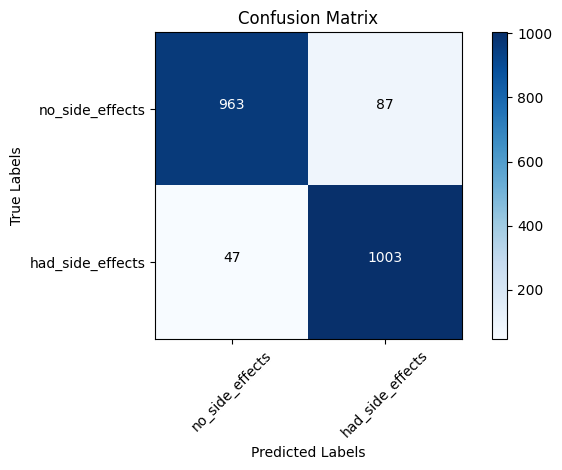

In [110]:
cm_plot_labels = ["no_side_effects", "had_side_effects"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

## Save and Load a model

In [111]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_2 (Dense)             (None, 16)                32        
                                                                 
 Layer_3 (Dense)             (None, 32)                544       
                                                                 
 Layer_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 1. model.save()

In [116]:
# Check first to see if file exists already.
# If not, the model is saved to disk.
import os.path

SAVE_FILE_NAME = "medical_trial_model"

SAVE_FILE_NAME += ".h5"
if os.path.isfile(os.path.join(os.getcwd(), SAVE_FILE_NAME)) is False:
    model.save(os.path.join(os.getcwd(), SAVE_FILE_NAME))

This function saves:
- The architecture of the model, allowing to re-create the model.
- The weights of the model.
- The training configuration (loss, optimizer)
- The state of the optimizer, allowing to resume training exactly where you left off.

In [118]:
from tensorflow.keras.models import load_model

LOAD_FILE_NAME = SAVE_FILE_NAME
new_model = load_model(os.path.join(os.getcwd(), LOAD_FILE_NAME))

In [119]:
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_2 (Dense)             (None, 16)                32        
                                                                 
 Layer_3 (Dense)             (None, 32)                544       
                                                                 
 Layer_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [120]:
new_model.get_weights()

[array([[ 0.7243076 , -0.3049085 , -0.2938841 , -0.09668538, -0.26987582,
          0.7783931 ,  0.37483224,  0.3554447 , -0.23860714, -0.04333514,
         -0.38872713, -0.38354716, -0.5350459 ,  0.5877499 , -0.4644678 ,
         -0.30706018]], dtype=float32),
 array([-0.17028925,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.1758021 ,  0.31430653, -0.10170832,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.12250466,  0.        ,
         0.        ], dtype=float32),
 array([[-0.50806236,  0.57360375,  0.18068074, -0.520311  , -0.18297651,
         -0.29915074, -0.21712008,  0.13126963,  0.31784478, -0.30308738,
          0.2968772 ,  0.43613622, -0.17432366, -0.28288576, -0.1790022 ,
          0.19102708,  0.33218843,  0.34574106, -0.3224559 ,  0.47004277,
         -0.18960923,  0.29806024, -0.19573942, -0.24220344, -0.3449538 ,
          0.2107912 ,  0.34127256, -0.30310795, -0.27582422,  0.41880372,
         -0.17454167, -0.00436938],
 

In [121]:
new_model.optimizer

### 2. model.to_json()

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [122]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [123]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_4", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "Layer_2_input"}}, {"class_name": "Dense", "config": {"name": "Layer_2", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "Layer_3", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "

In [124]:
# model reconstruction from JSON
from tensorflow.keras.models import model_from_json

model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tensorflow.keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [125]:
model_architecture.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_2 (Dense)             (None, 16)                32        
                                                                 
 Layer_3 (Dense)             (None, 32)                544       
                                                                 
 Layer_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 3. model.save_weights()